# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

### 1.1 Load data

In [2]:
# Your code here
# Load the data
df = pd.read_csv('assignment2_data_2024.csv')
df.head()

label         mean radius  mean texture  mean perimeter   mean area  \
0  malignant  15.494653829645529     15.902542      103.008265  776.437239   
1  malignant  16.229870799611437     18.785613      105.176755  874.712003   
2  malignant   16.34567074196476     20.114076      107.083804  872.563251   
3   maligant  13.001009157806651     19.876997       85.889775  541.281012   
4  malignant  16.416060073302194     17.397533      107.857386  891.516818   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0         0.104239          0.168660        0.170572             0.085668   
1         0.091843          0.092548        0.081681             0.053670   
2         0.099924          0.123799        0.128788             0.078310   
3         0.113423          0.173069        0.146214             0.069574   
4         0.097321          0.111530        0.125971             0.068575   

   mean symmetry  ...  radius error  texture error  perimeter error  \
0       0.205053  ...      0.653654       1.096678         4.962255   
1       0.180435  ...      0.445451       1.043931         3.005373   
2       0.189756  ...      0.549625       1.057447         3.643671   
3       0.212078  ...      0.430693       1.202955         3.051434   
4       0.179562  ...      0.525532       1.045900         3.747194   

   area error  smoothness error  compactness error  concavity error  \
0   80.619370          0.006669           0.034950         0.043568   
1   50.407958          0.006352           0.019998         0.025324   
2   62.732851          0.006757           0.031325         0.034350   
3   33.614356          0.007930           0.044881         0.042972   
4   59.164555          0.008718           0.024231         0.039763   

   concave points error  symmetry error  fractal dimension error  
0              0.013765        0.024093                 0.004928  
1              0.012172        0.018084                 0.003582  
2              0.015150        0.021459                 0.004066  
3              0.014556        0.035670                 0.005981  
4              0.014202        0.019236                 0.004115  

[5 rows x 21 columns]

In [9]:
# Extract the feature names and label name
feature_names = df.columns[1:]
label_name = df.columns[0]

# Print the feature names  
print('Feature names:', feature_names)

# Print the label name
print('Label name:', label_name)

Feature names: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'],
      dtype='object')
Label name: label


In [3]:
# Check the labels
df['label'].unique()

array(['malignant', 'maligant', 'benign'], dtype=object)

There is a typo error in 'malignant' label

In [4]:
# Correct the labels and convert to numerical values
df['label'] = df['label'].map({'malignant': 1, 'maligant': 1, 'benign': 0})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    int64  
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

The type of 'mean radius' column is object. There could be typo error.

In [6]:
# Check non-numerical values in the 'mean radius' column
mean_radius = pd.to_numeric(df['mean radius'], errors='coerce')
non_numerical_values = df['mean radius'][mean_radius.isna()]
non_numerical_values

61    n12.254518716420597
Name: mean radius, dtype: object

There is a non-numerical value, which is a typo error.

In [7]:
# Remove the letter 'n' from 'mean radius' and convert to numeric
df['mean radius'] = df['mean radius'].str.replace('n', '').astype(float)

In [8]:
# Check the descriptive statistics
df.describe()

label  mean radius  mean texture  mean perimeter    mean area  \
count  220.000000   220.000000    220.000000      220.000000   220.000000   
mean     0.300000    13.686773     18.991963       89.866240   620.956227   
std      0.459303     2.173254      1.427635        7.366180   106.419871   
min      0.000000   -14.292182     15.349270       74.690886    -2.645499   
25%      0.000000    13.081811     17.914319       84.911981   558.731832   
50%      0.000000    13.640511     18.928256       88.587737   603.806128   
75%      1.000000    14.268236     19.995859       93.066393   655.690435   
max      1.000000    18.200299     24.430831      121.247839  1103.740620   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       220.000000        220.000000      220.000000           220.000000   
mean          0.096480          0.102879        0.085281             0.046867   
std           0.004961          0.019819        0.026911             0.012548   
min           0.084651          0.075184        0.050771             0.028701   
25%           0.092797          0.089531        0.066525             0.038106   
50%           0.096457          0.098517        0.075748             0.042761   
75%           0.099817          0.113276        0.098826             0.055337   
max           0.113423          0.192880        0.201971             0.100467   

       mean symmetry  ...  radius error  texture error  perimeter error  \
count     220.000000  ...    220.000000     220.000000       220.000000   
mean        0.181850  ...      0.393337       1.217593         2.775090   
std         0.010816  ...      0.075828       0.210182         0.579317   
min         0.157059  ...      0.298005       0.898026         2.059186   
25%         0.174944  ...      0.343114       1.073344         2.394331   
50%         0.180953  ...      0.367863       1.165727         2.610732   
75%         0.186354  ...      0.420514       1.300769         3.003888   
max         0.226448  ...      0.712896       2.561348         5.903661   

       area error  smoothness error  compactness error  concavity error  \
count  220.000000        220.000000         220.000000       220.000000   
mean    37.781034          0.007076           0.025514         0.031901   
std      9.988655          0.001043           0.007345         0.014102   
min     27.693748          0.004994           0.016907         0.018730   
25%     31.843894          0.006372           0.020530         0.025373   
50%     34.007608          0.006837           0.023147         0.028835   
75%     39.042484          0.007675           0.027733         0.033620   
max     80.619370          0.011088           0.054950         0.163592   

       concave points error  symmetry error  fractal dimension error  
count            220.000000      219.000000               220.000000  
mean               0.011762        0.020901                 0.003873  
std                0.002422        0.003250                 0.001259  
min                0.007253        0.016181                 0.002631  
25%                0.010336        0.018658                 0.003225  
50%                0.011357        0.020193                 0.003555  
75%                0.012669        0.022195                 0.004046  
max                0.026554        0.041861                 0.013251  

[8 rows x 21 columns]

### 1.2 Visualise

array([[<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>],
       [<Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>],
       [<Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>],
       [<Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
       

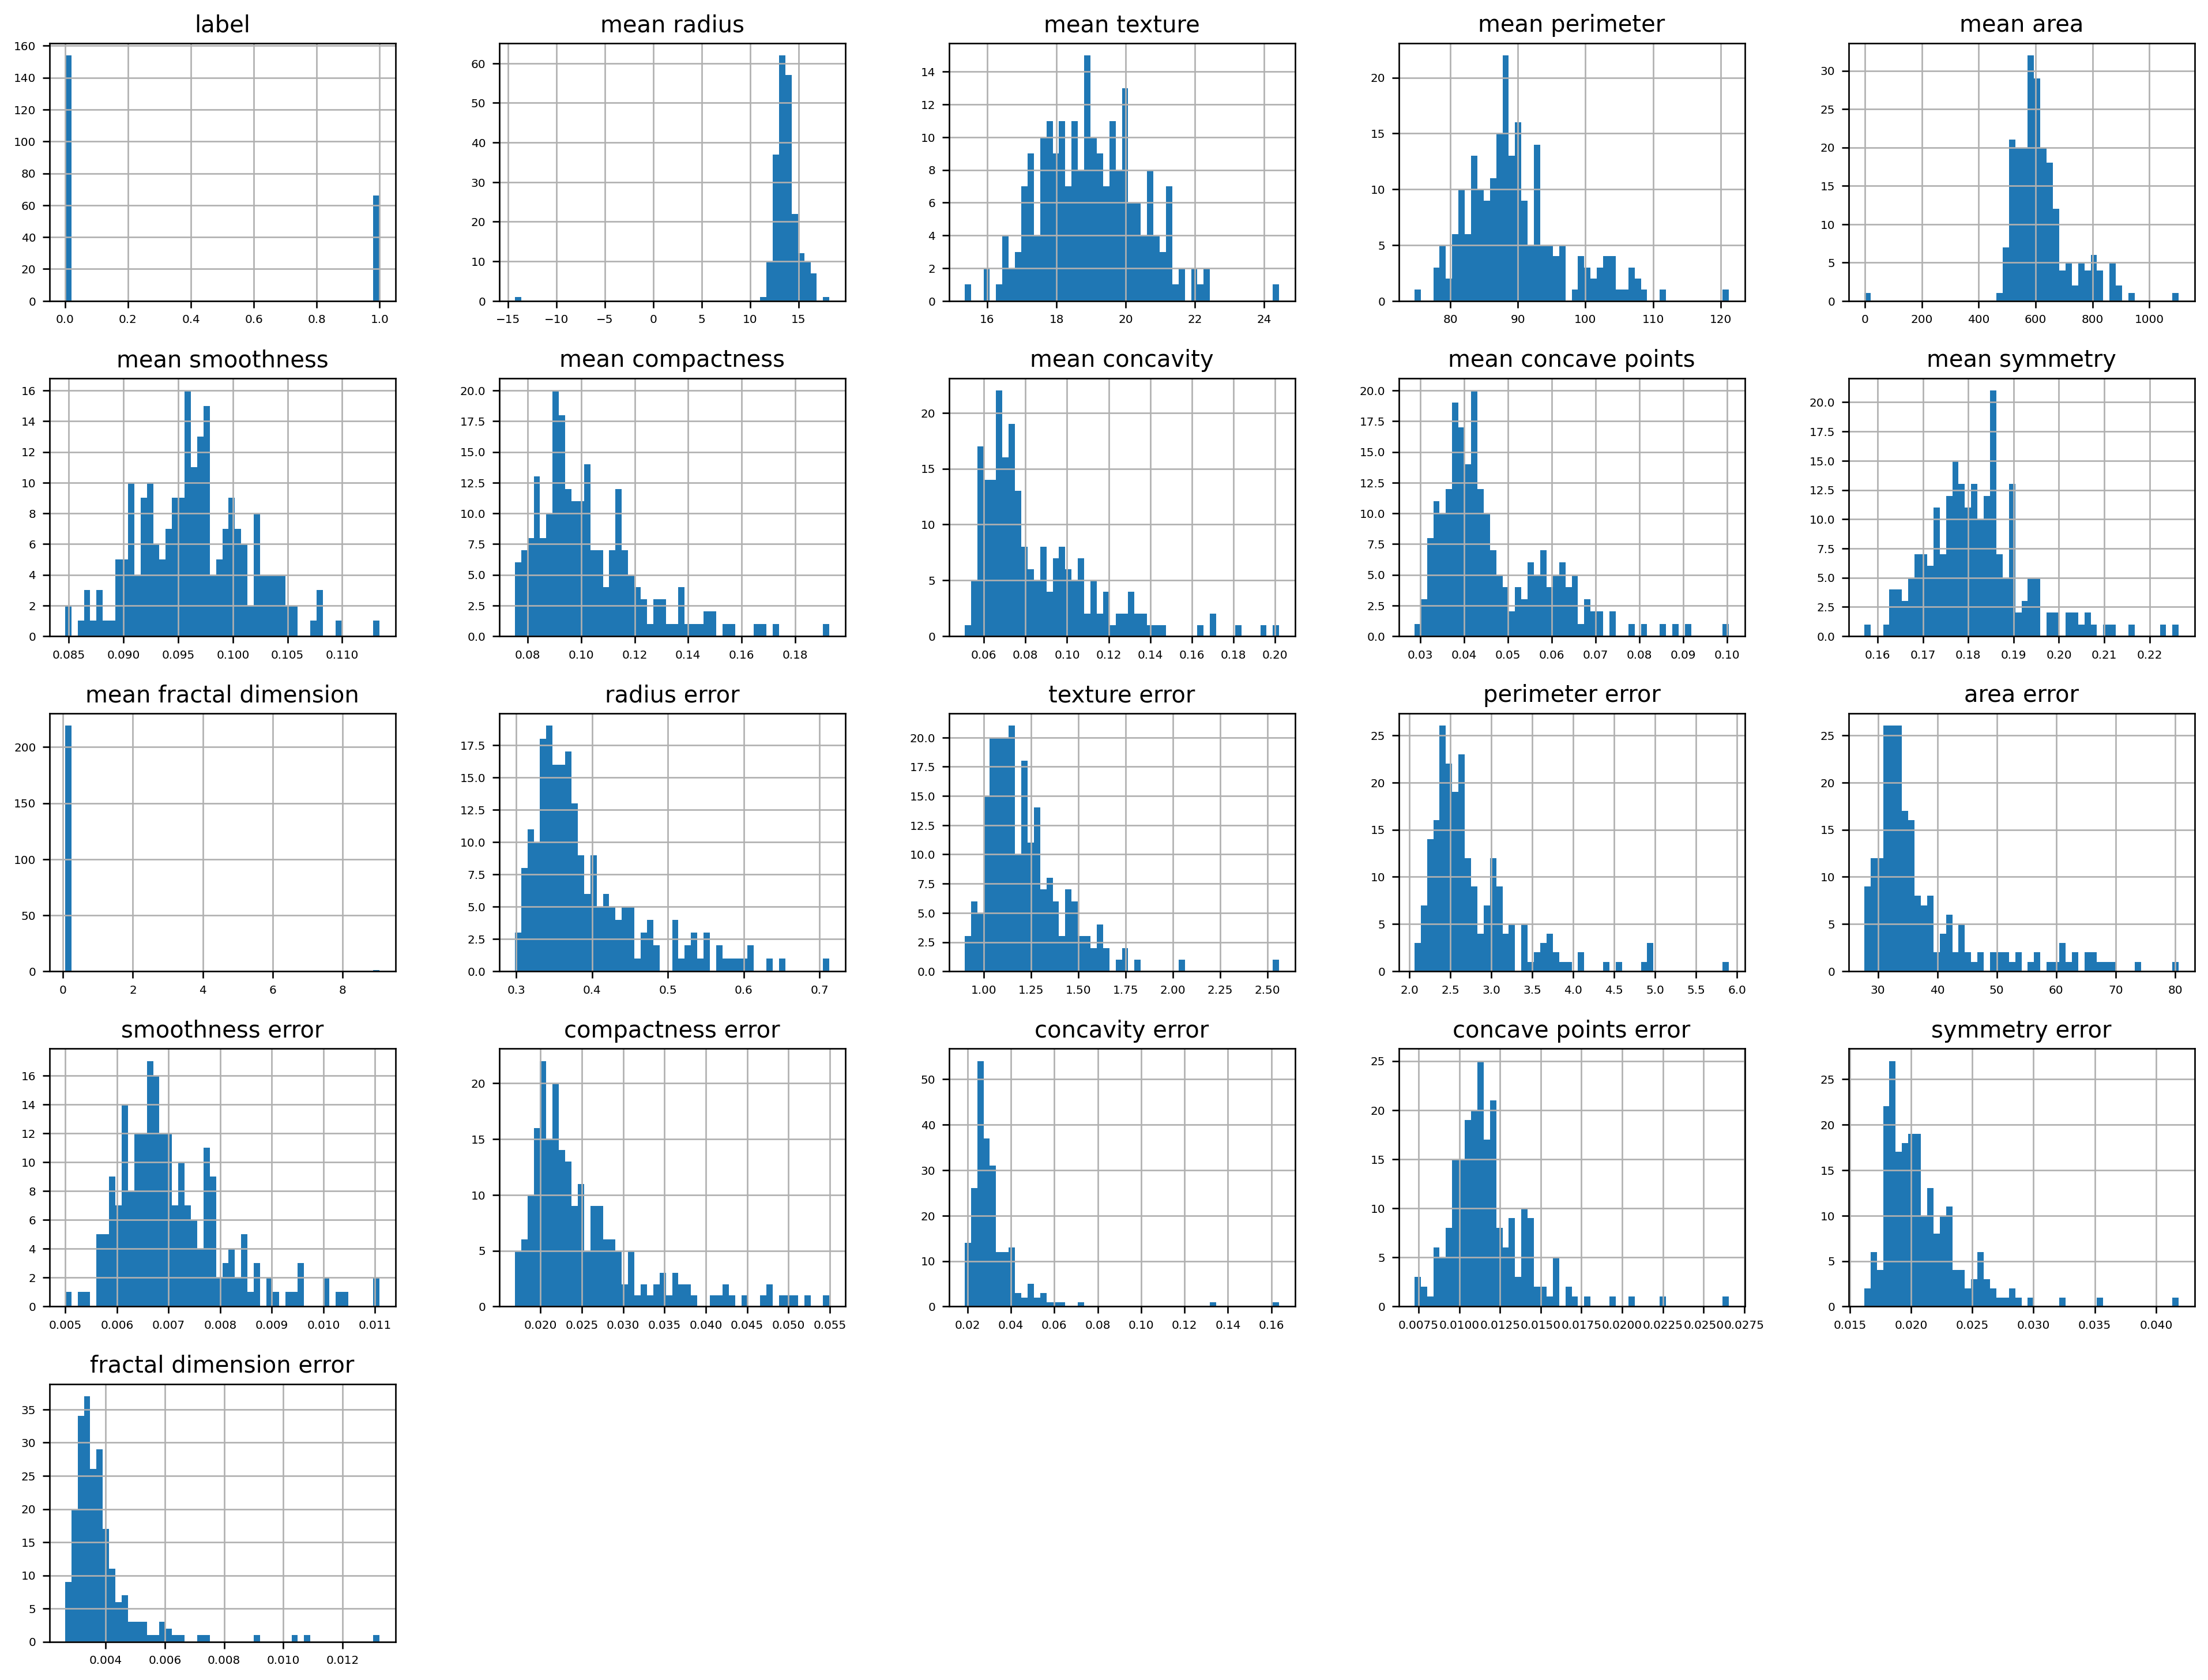

In [9]:
df.hist(bins=50, figsize=(20,15))

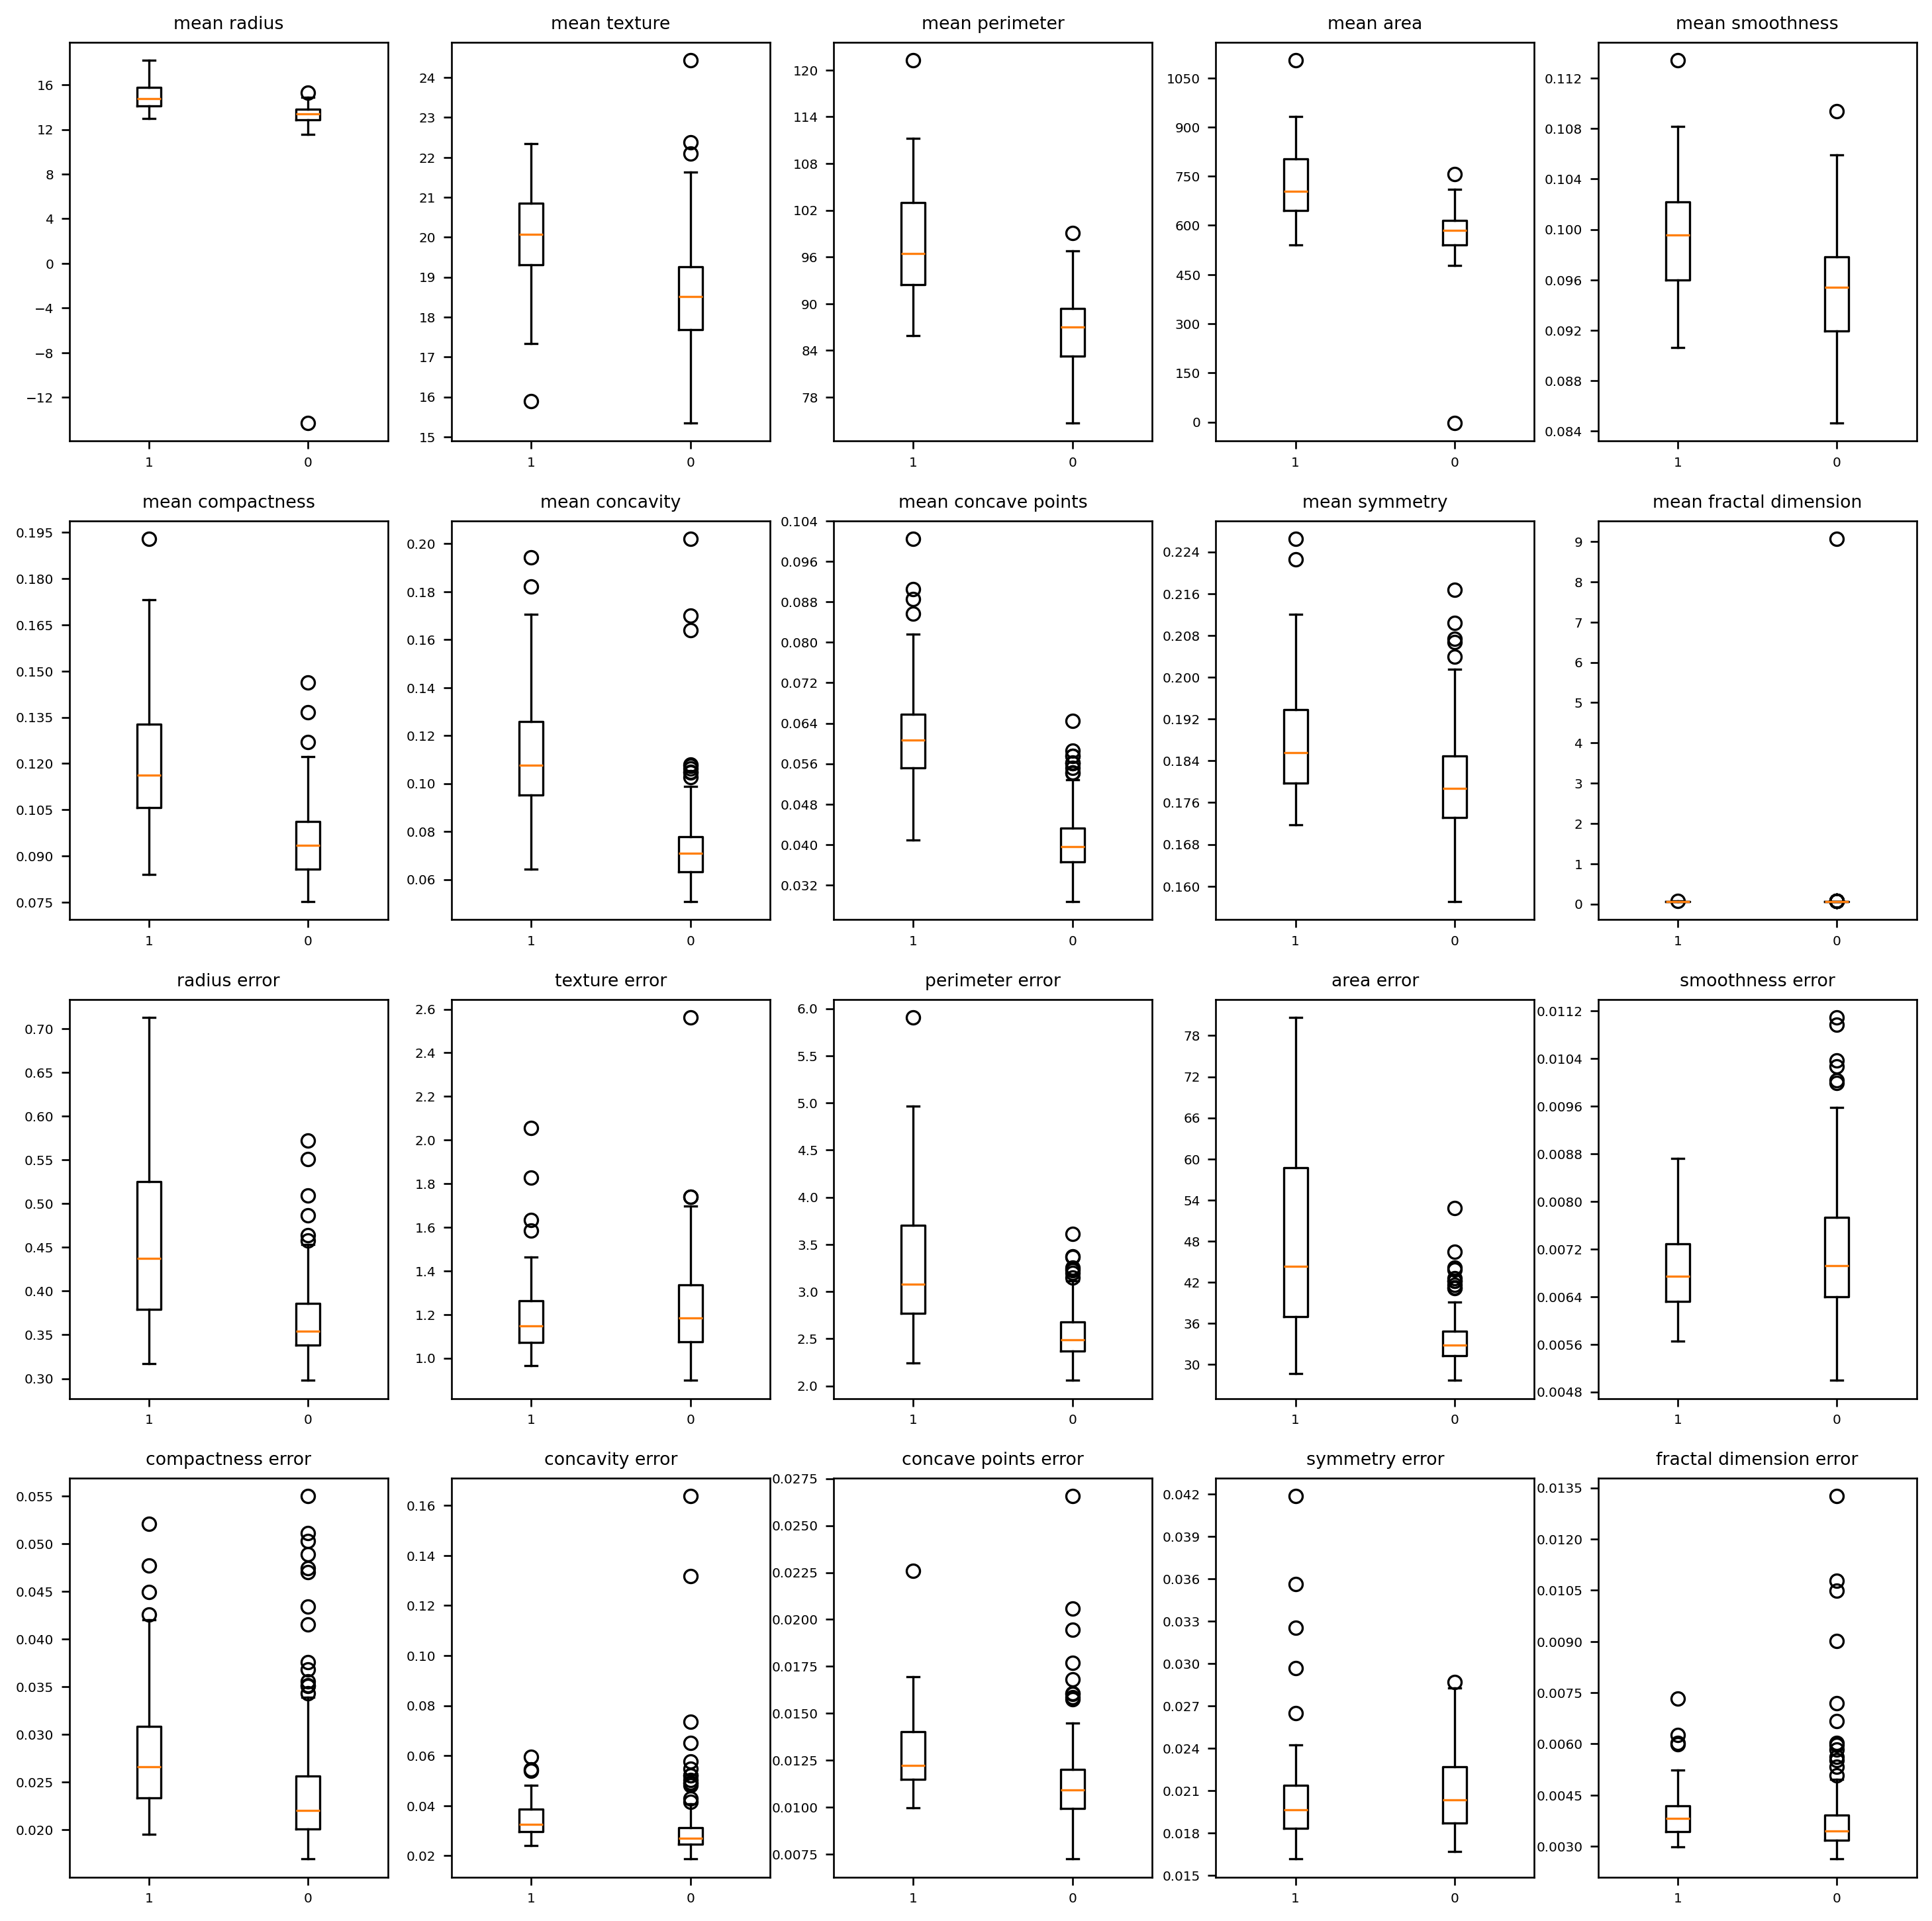

In [10]:
# List of columns to scatter plots
col_boxes = df.columns.drop('label')

# Create a figure and axes
fig, axes = plt.subplots(4, 5, figsize=(15, 15), sharex=False)

# Flatten the axes
axes = axes.flatten()

# Plotting
for i, column in enumerate(col_boxes):
    # Group by 'label' and create a list of data arrays
    grouped_data = [df[df['label'] == label][column].dropna() for label in df['label'].unique()]

    # Drop 'label' column
    grouped_data = [data for data in grouped_data if column != 'label']

    # Plot boxplot
    axes[i].boxplot(grouped_data, vert=True)
    axes[i].set_title(column, fontsize=8)
    axes[i].set_xticklabels(df['label'].unique())
    # axes[i].set_xlabel('label')
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=10))

# # Hide the last 3 subplots
# for ax in axes[-3:]:
#     ax.axis('off')

# Show plot
plt.show()

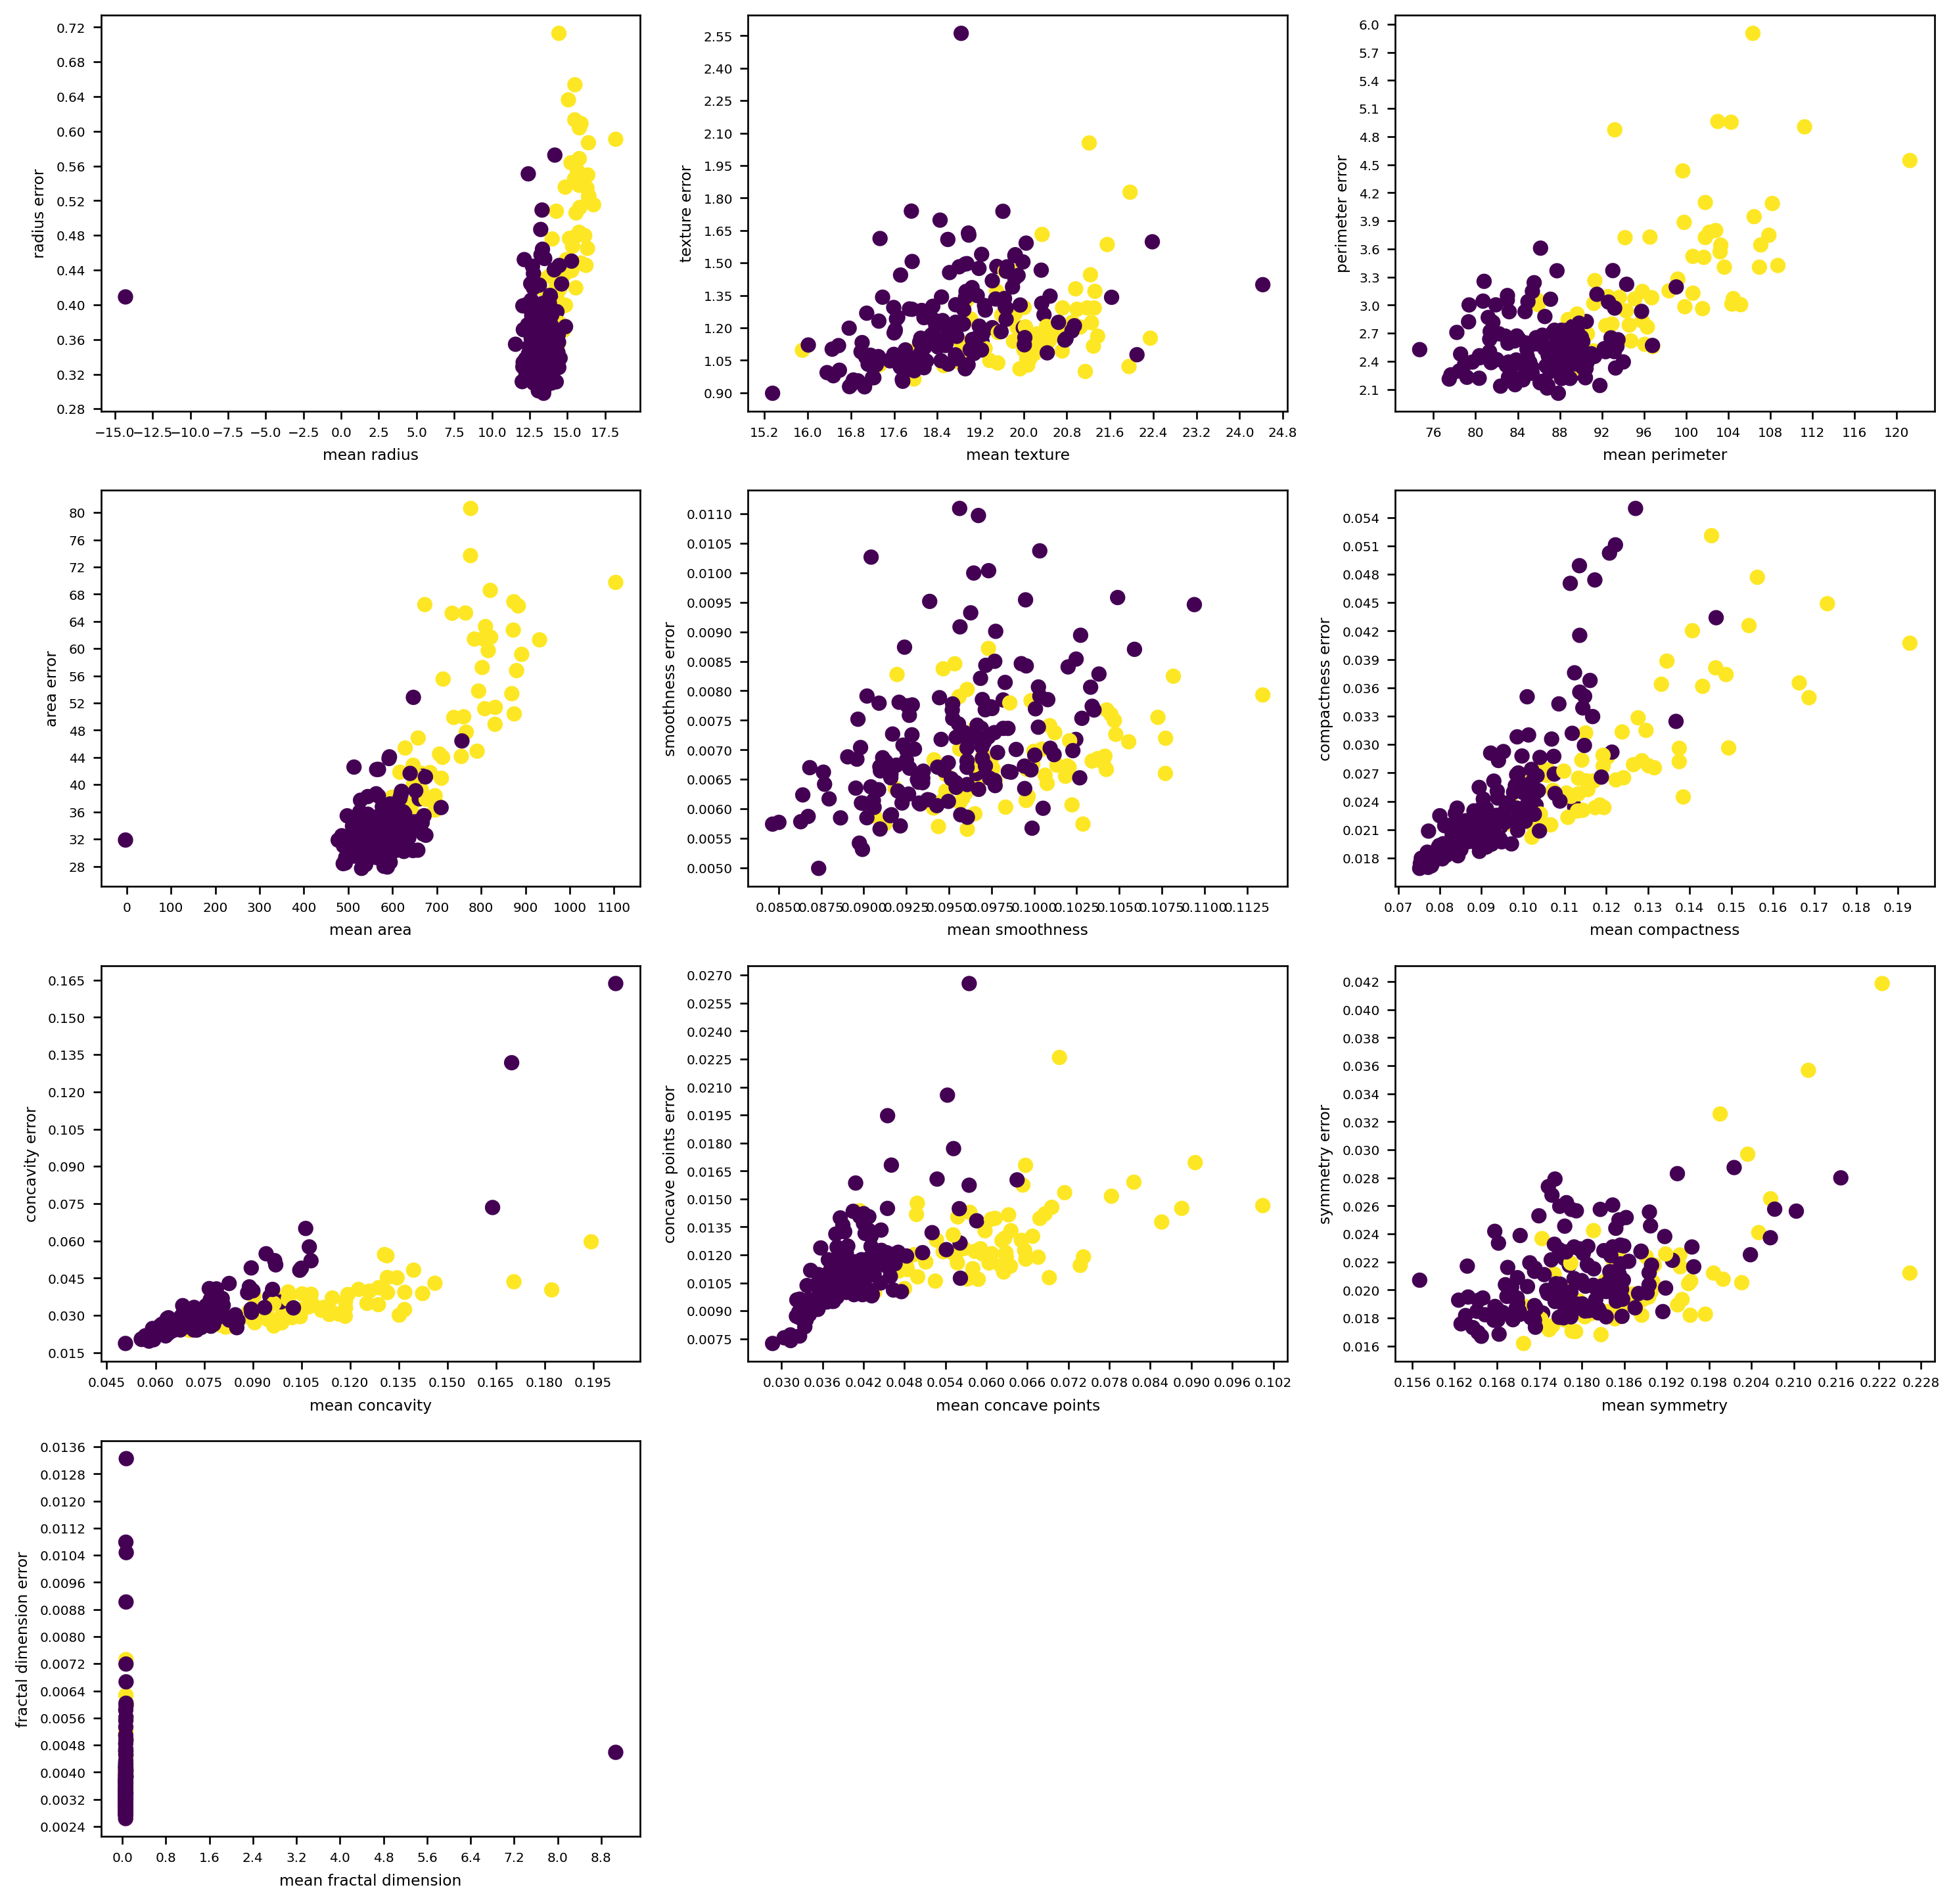

In [11]:
mean_columns = df.filter(regex='mean')
error_columns = df.filter(regex='error')

# Create a figure and axes
fig, axes = plt.subplots(4, 3, figsize=(15,15))

# Flatten the axes
axes = axes.flatten()

# Plotting
for i, (x_col, y_col) in enumerate(zip(mean_columns.columns, error_columns.columns)):
    axes[i].scatter(df[x_col], df[y_col], c=df['label'])
    axes[i].set_ylabel(y_col)
    axes[i].set_xlabel(x_col)   
    # axes[i].set_title(x_col + y_col)
    # axes[i].set_xticks([])
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=15))
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=15))

# Hide the last 2 subplots
for ax in axes[-2:]:
    ax.axis('off')

# Show plot
plt.show()

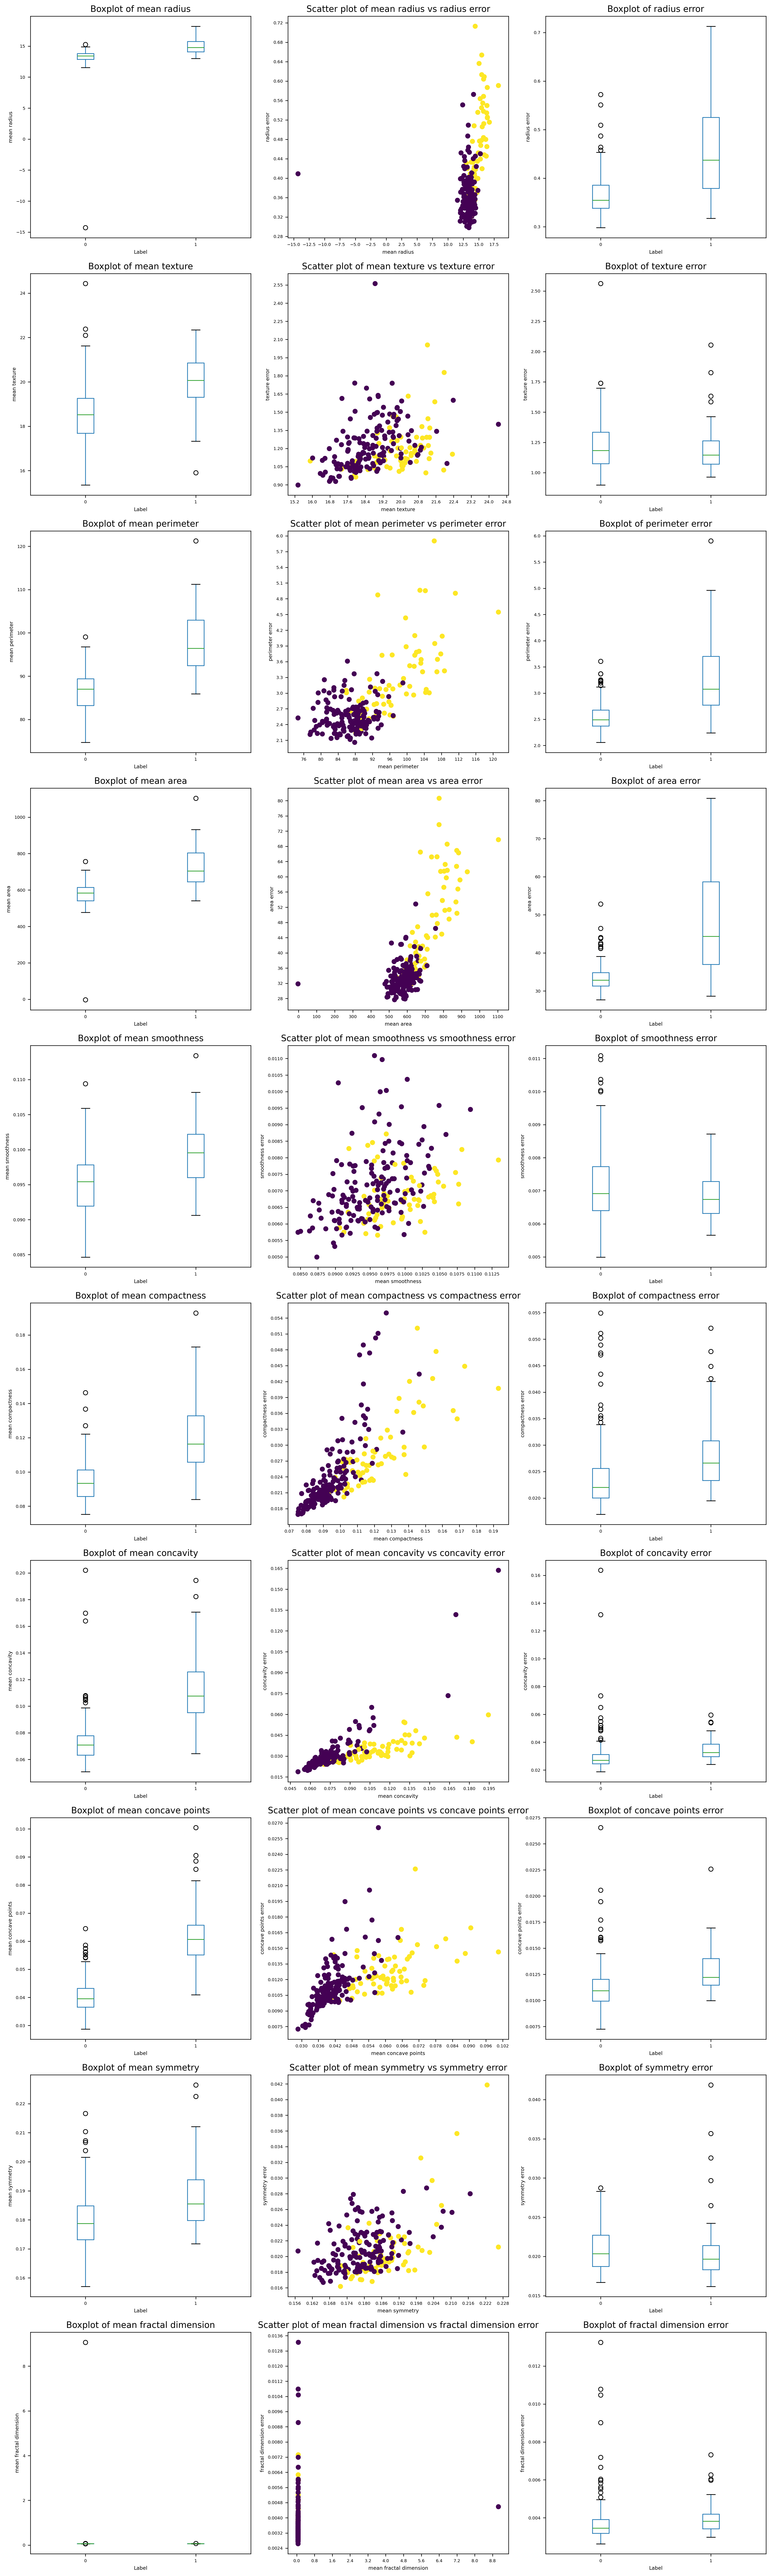

In [12]:
mean_columns = df.filter(regex='mean')
error_columns = df.filter(regex='error')

# Create a figure and axes
fig, ax = plt.subplots(len(mean_columns.columns), 3, figsize=(15, 5 * len(mean_columns.columns)))

# Plotting
for i, (x_col, y_col) in enumerate(zip(mean_columns.columns, error_columns.columns)):
    # Boxplot for df[x_col]
    df.boxplot(x_col, by='label', ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {x_col}')
    ax[i, 0].set_xlabel('Label')
    ax[i, 0].set_ylabel(x_col)
    ax[i, 0].get_figure().suptitle('')  # Remove the automatic 'group by' title
    ax[i, 0].grid(False)  # Hide grid
    
    # Scatter plot df[x_col] vs df[y_col]
    ax[i, 1].scatter(df[x_col], df[y_col], c=df['label'])
    ax[i, 1].set_title(f'Scatter plot of {x_col} vs {y_col}')
    ax[i, 1].set_xlabel(x_col)
    ax[i, 1].set_ylabel(y_col)
    ax[i, 1].xaxis.set_major_locator(MaxNLocator(nbins=15))
    ax[i, 1].yaxis.set_major_locator(MaxNLocator(nbins=15))
    
    # Boxplot for df[y_col]
    df.boxplot(y_col, by='label', ax=ax[i, 2])
    ax[i, 2].set_title(f'Boxplot of {y_col}')
    ax[i, 2].set_xlabel('Label')
    ax[i, 2].set_ylabel(y_col)
    ax[i, 2].get_figure().suptitle('')  # Remove the automatic 'group by' title
    ax[i, 2].grid(False)  # Hide grid

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [13]:
# mean_columns = df.filter(regex='mean')
# error_columns = df.filter(regex='error')

# # Create a figure and axes
# fig, ax = plt.subplots(len(mean_columns.columns), 2, figsize=(15, 5 * len(mean_columns.columns)))

# # Plotting
# for i, (x_col, y_col) in enumerate(zip(mean_columns.columns, error_columns.columns)):
#     # Combined boxplot for df[x_col] and df[y_col] grouped by label
#     combined_data = pd.concat([df[[x_col, 'label']], df[[y_col, 'label']].rename(columns={y_col: x_col})], ignore_index=True)
#     combined_data['variable'] = ['x_col']*len(df) + ['y_col']*len(df)
#     combined_data.columns = ['value', 'label', 'variable']
    
#     combined_data.boxplot(column='value', by=['label', 'variable'], ax=ax[i, 0])
#     ax[i, 0].set_title(f'Boxplot of {x_col} and {y_col}')
#     ax[i, 0].set_xlabel('Label and Variable')
#     ax[i, 0].set_ylabel('Value')
#     ax[i, 0].get_figure().suptitle('')  # Remove the automatic 'group by' title
#     ax[i, 0].grid(False)  # Hide grid
    
#     # Scatter plot df[x_col] vs df[y_col]
#     scatter = ax[i, 1].scatter(df[x_col], df[y_col], c=df['label'], cmap='viridis')
#     ax[i, 1].set_title(f'Scatter plot of {x_col} vs {y_col}')
#     ax[i, 1].set_xlabel(x_col)
#     ax[i, 1].set_ylabel(y_col)
#     ax[i, 1].xaxis.set_major_locator(MaxNLocator(nbins=15))
#     ax[i, 1].yaxis.set_major_locator(MaxNLocator(nbins=15))
#     ax[i, 1].grid(False)  # Hide grid

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show plot
# plt.show()

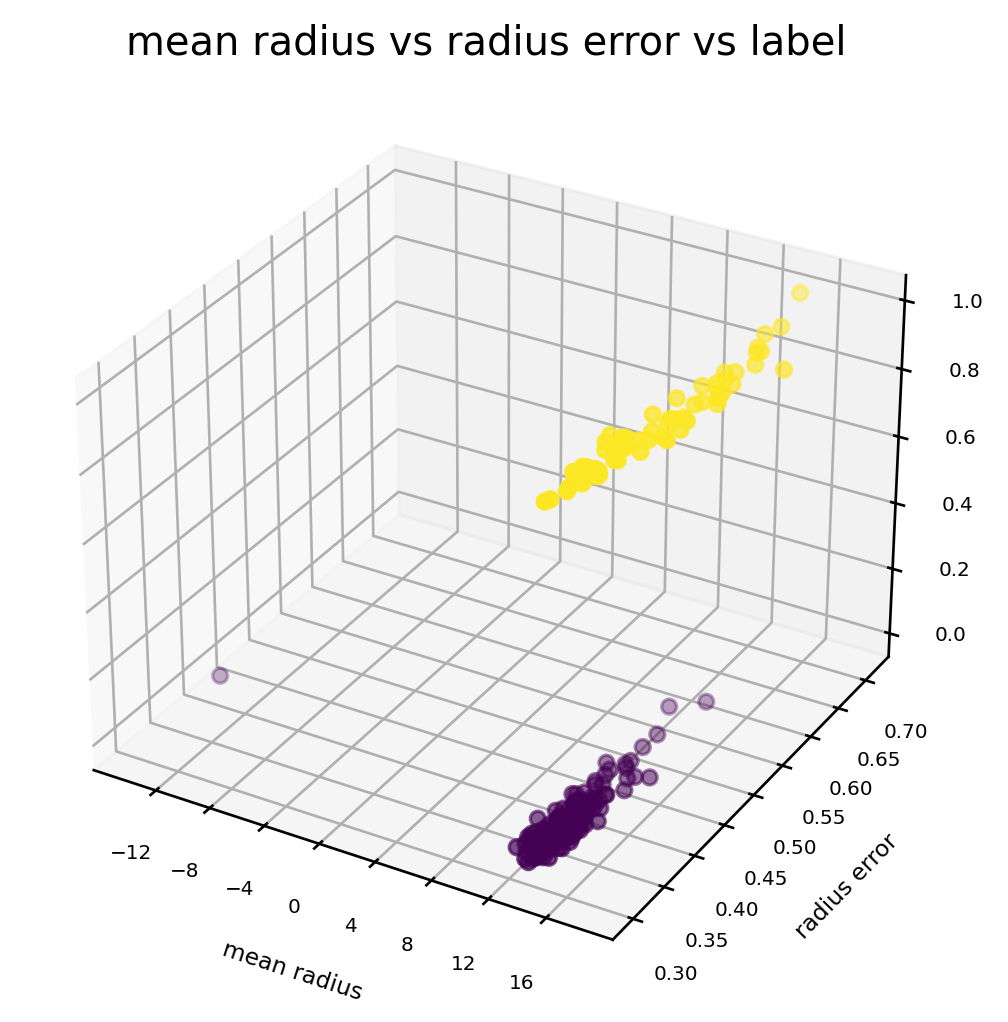

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.ticker import MaxNLocator
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['mean radius'], df['radius error'], df['label'], c=df['label'])

ax.set_xlabel('mean radius')
ax.set_ylabel('radius error')
ax.set_zlabel('label')
ax.set_xticks(df['mean radius'].unique())
ax.set_title('mean radius vs radius error vs label')

ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
# ax.zaxis.set_major_locator(MaxNLocator(nbins=2))

def update(frame):
    ax.view_init(elev=30, azim=frame)

ani = FuncAnimation(fig, update, frames=range(0, 360, 1), interval=100)

plt.show()

In [15]:
sns.pairplot(df, hue='label', palette='deep')

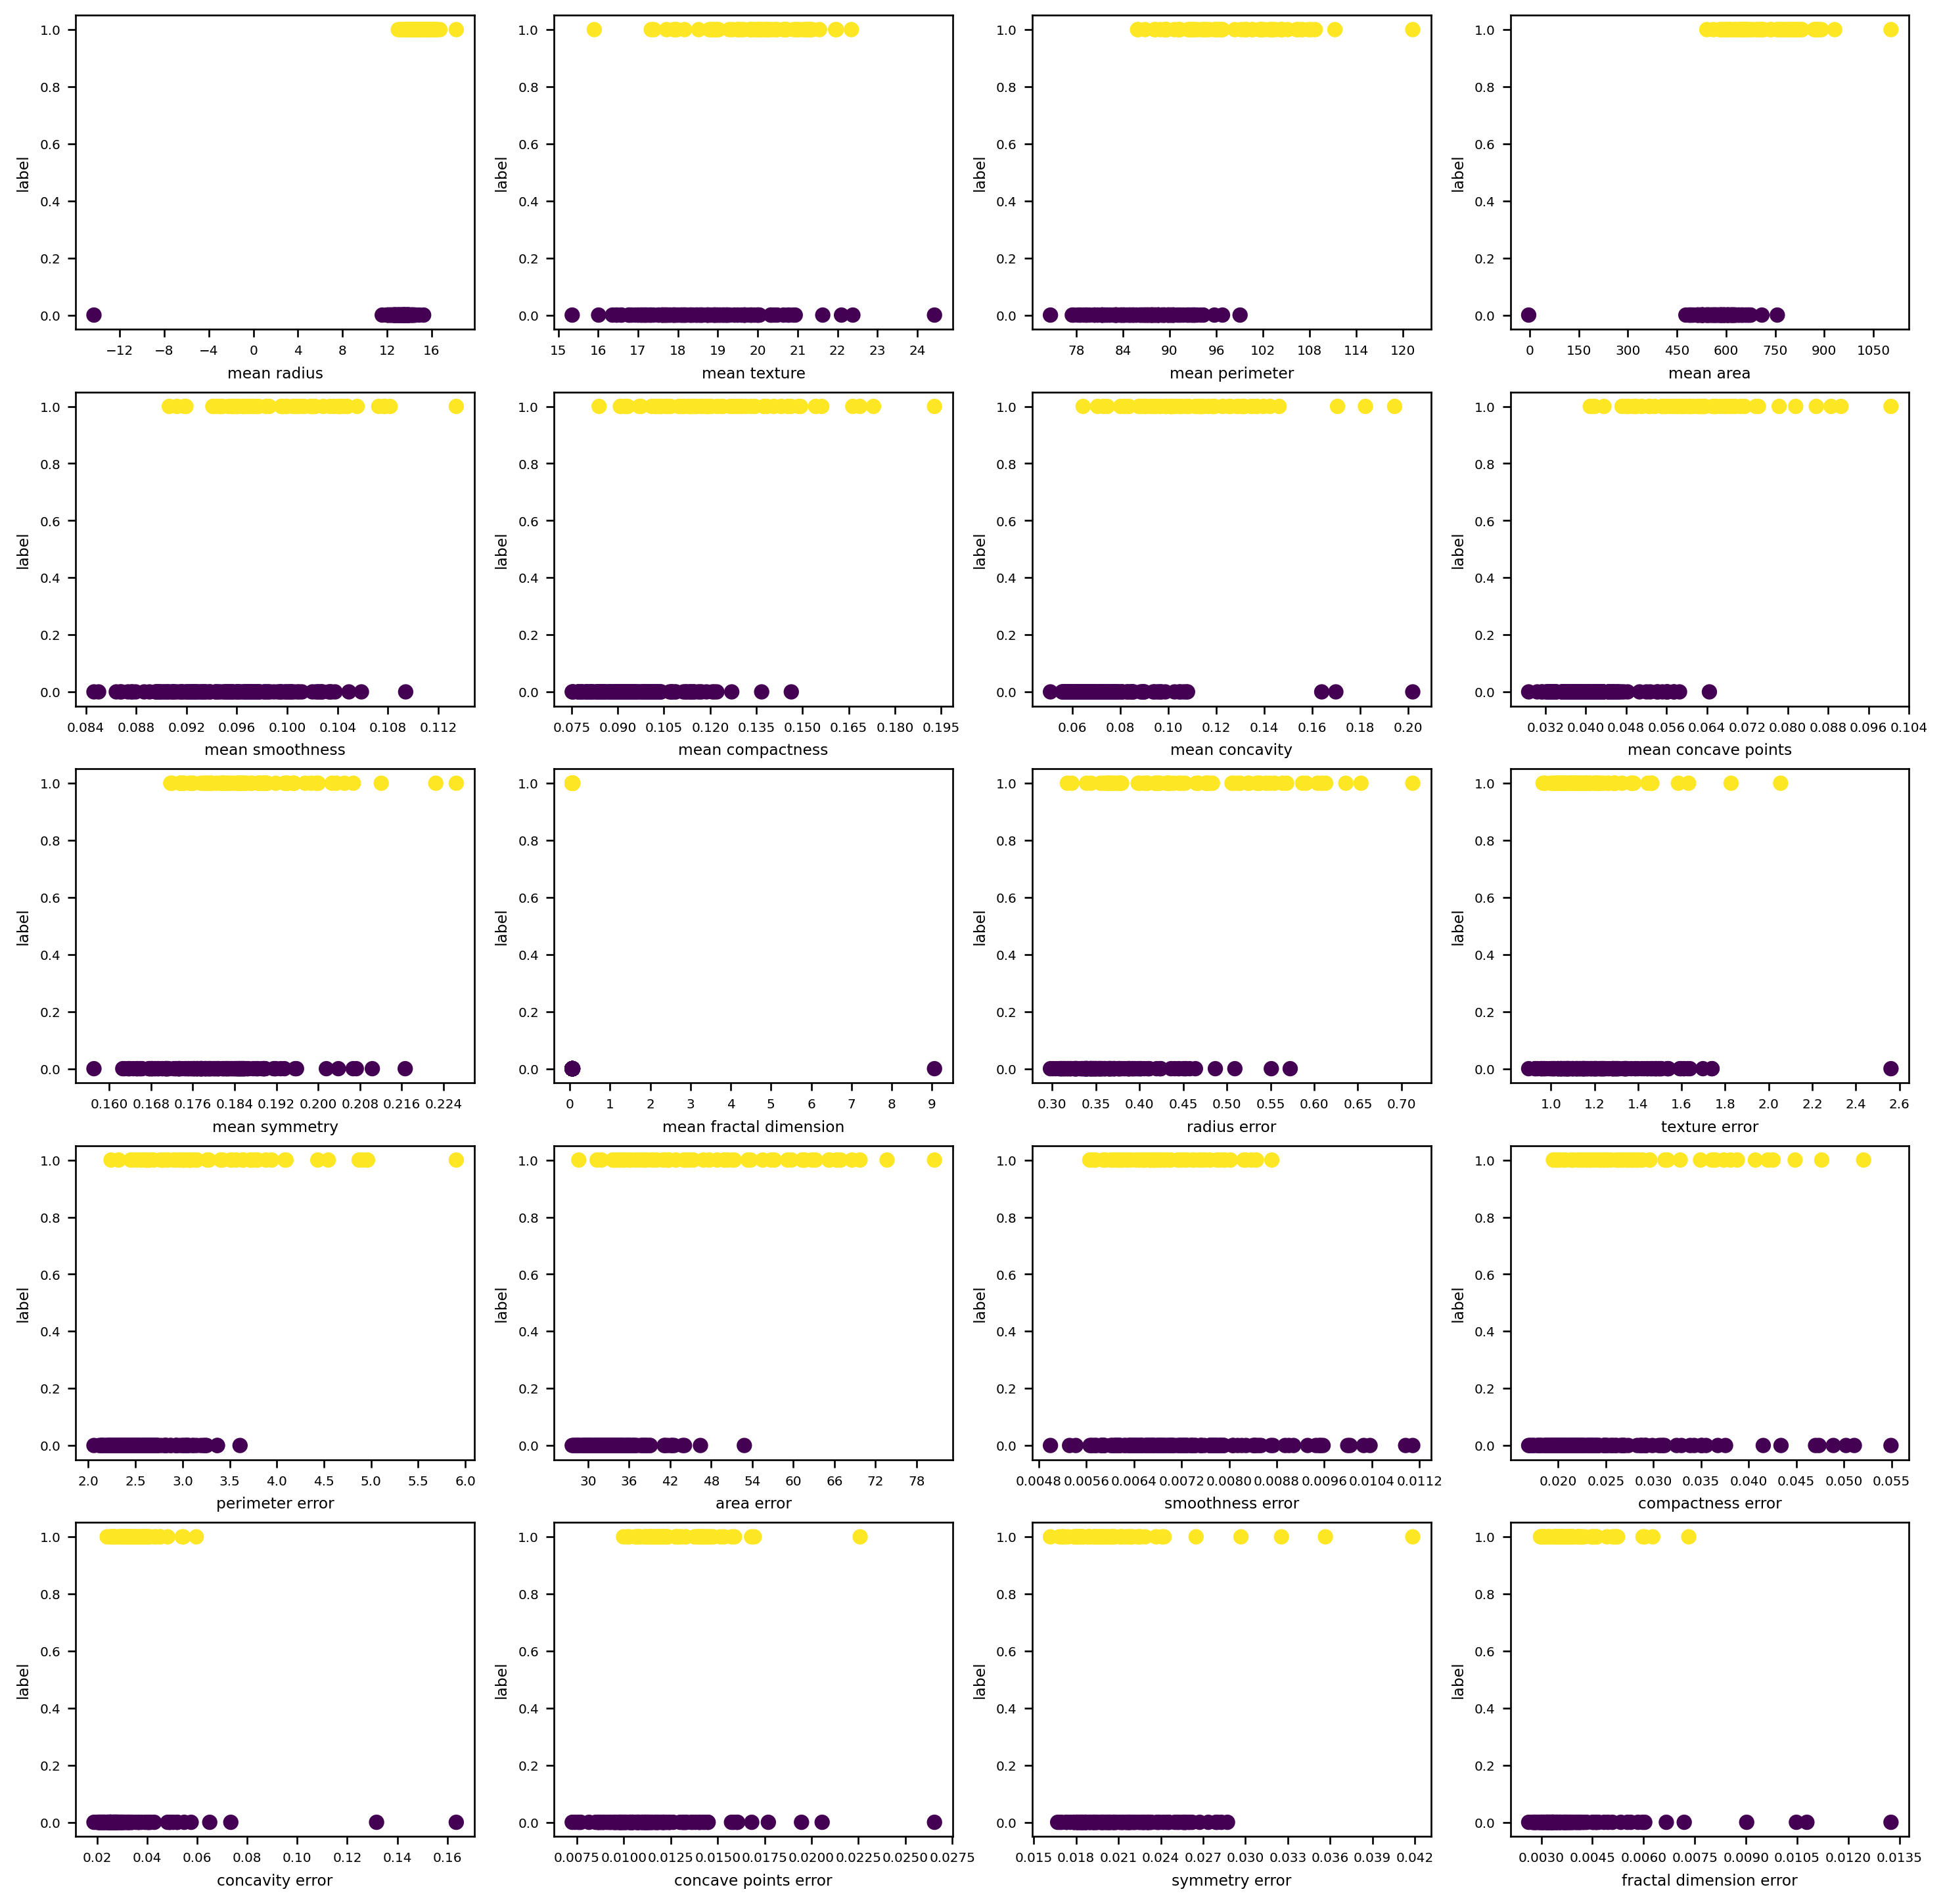

In [ ]:
# # Plotting all columns with 'labels' column
# List of columns to scatter plots
col_plots = df.columns.drop('label')

# Create a figure and axes
fig, axs = plt.subplots(5, 4, figsize=(15, 15), sharex=False)

# Flatten the axes
axs = axs.flatten()

# Plotting
for i, column in enumerate(col_plots):
    axs[i].scatter(df[column], df['label'], c=df['label'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('label')   
    # axs[i].set_title(column + ' vs label', fontsize=8)
    # axs[i].set_xticks([])
    axs[i].xaxis.set_major_locator(MaxNLocator(nbins=10))
    # axs[i].yaxis.set_major_locator(MaxNLocator(nbins=2))

# Show plot
plt.show()

<Axes: >

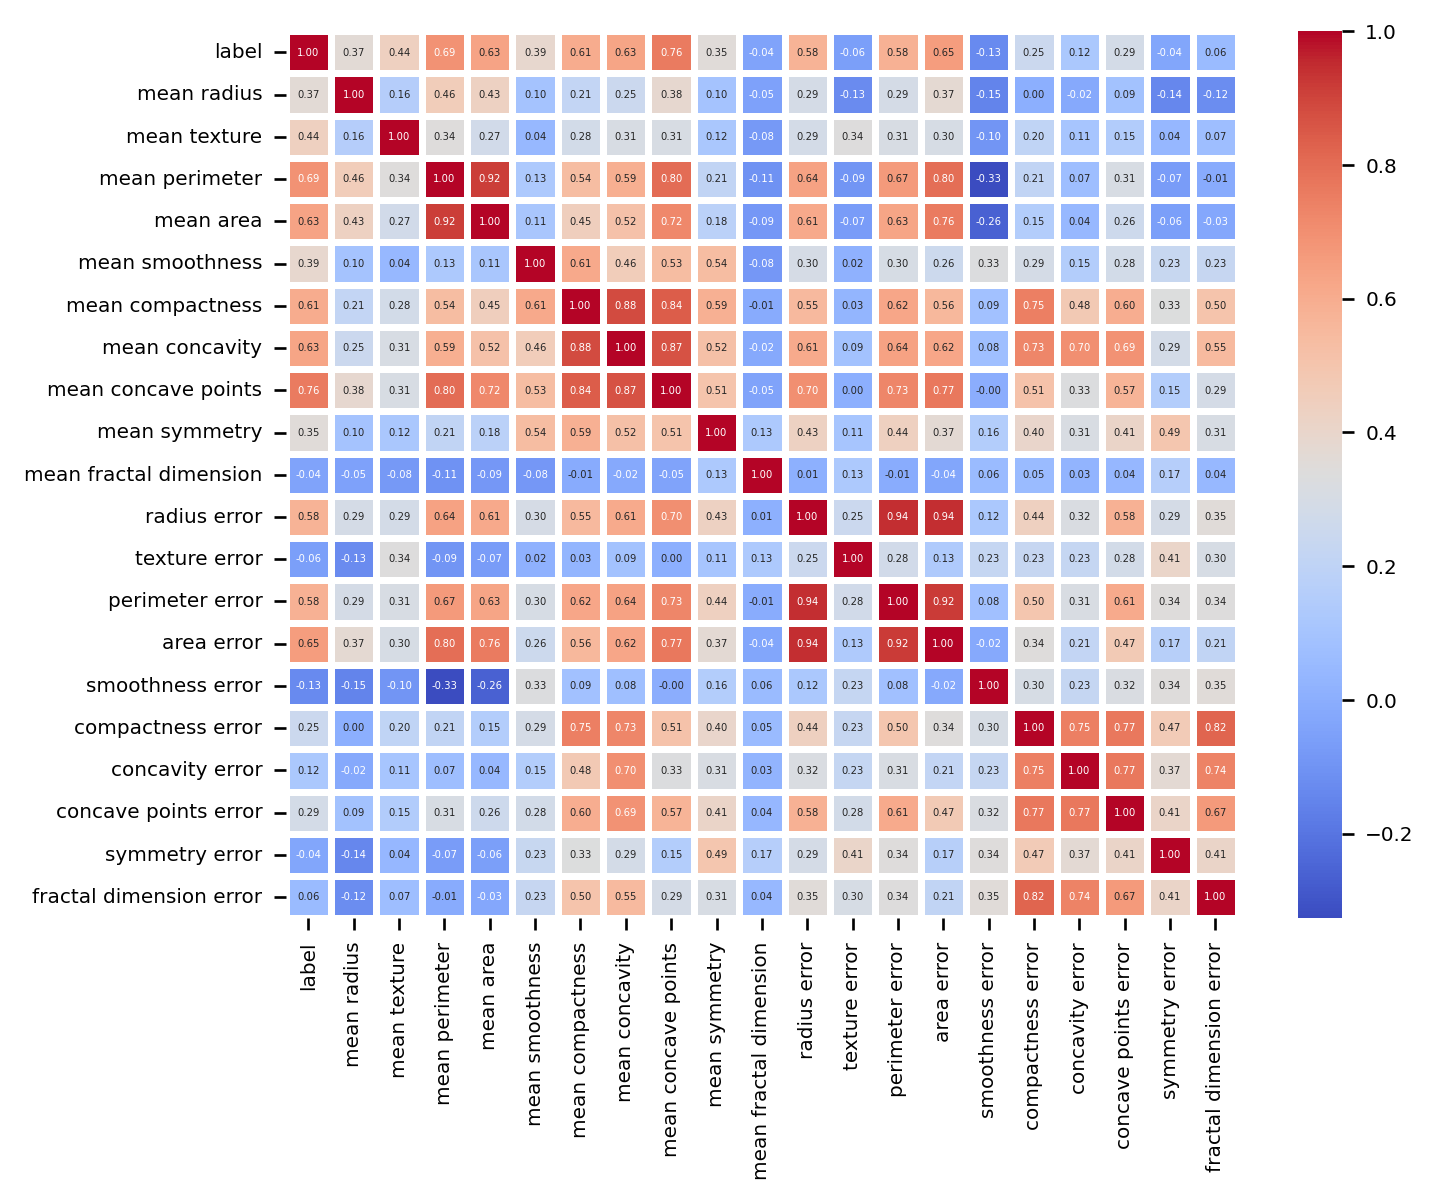

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, annot_kws={"size": 3})

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [ ]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [ ]:
# Your code here

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [ ]:
# Answer here

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [ ]:
# Your code here

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [ ]:
# Answer here

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [ ]:
# Your code here

### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [ ]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# Your code here

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [ ]:
# Answer here